## Data description:
For this code example, I'm using a Whatsapp export of one of my personal chats. The code has been used by me to analyze Telegram personal and group chats as well.

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from nltk.tokenize import wordpunct_tokenize
import nltk
from nltk.corpus import stopwords
from string import punctuation
import re
from wordcloud import WordCloud

In [2]:
def remove_stopwords(tokenized_texts):
    clear_texts = []
    for word in tokenized_texts:
        if word not in stops:
            clear_texts.append(word)

    return clear_texts

In [3]:
def create_cloud_graph(corpus):
    wordcloud = WordCloud(
        width=1600, 
        height=800, 
        max_words=100, 
        background_color='white', 
        colormap='viridis', 
        prefer_horizontal=0.5,
        #relative_scaling=0.1,
        max_font_size=200,
        font_step=3,
        margin=5,
        collocations=False
    ).generate(' '.join(corpus))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
symbol = ':'  

with open('_chat.txt', 'r') as f:
    lines = f.readlines()

with open('_chat.txt', 'w') as f:
    for line in lines:
        if symbol in line:
            line = line.split(symbol, 1)[1]
        f.write(line)

In [5]:
data = list(open('_chat.txt'))

In [6]:
clear_data = []
rus = re.compile(r'^[А-Яа-яЁё]+$')
for d in data:
        d = wordpunct_tokenize(d.strip('\n'))
        if d:
            for word in d:
                if word.isalpha():
                    if rus.match(word):
                        if word.lower() != "изображение" and word.lower() != "отсутствует":
                            clear_data.append(word.lower())

In [8]:
stops = stopwords.words('russian')
clear_data = remove_stopwords(clear_data)

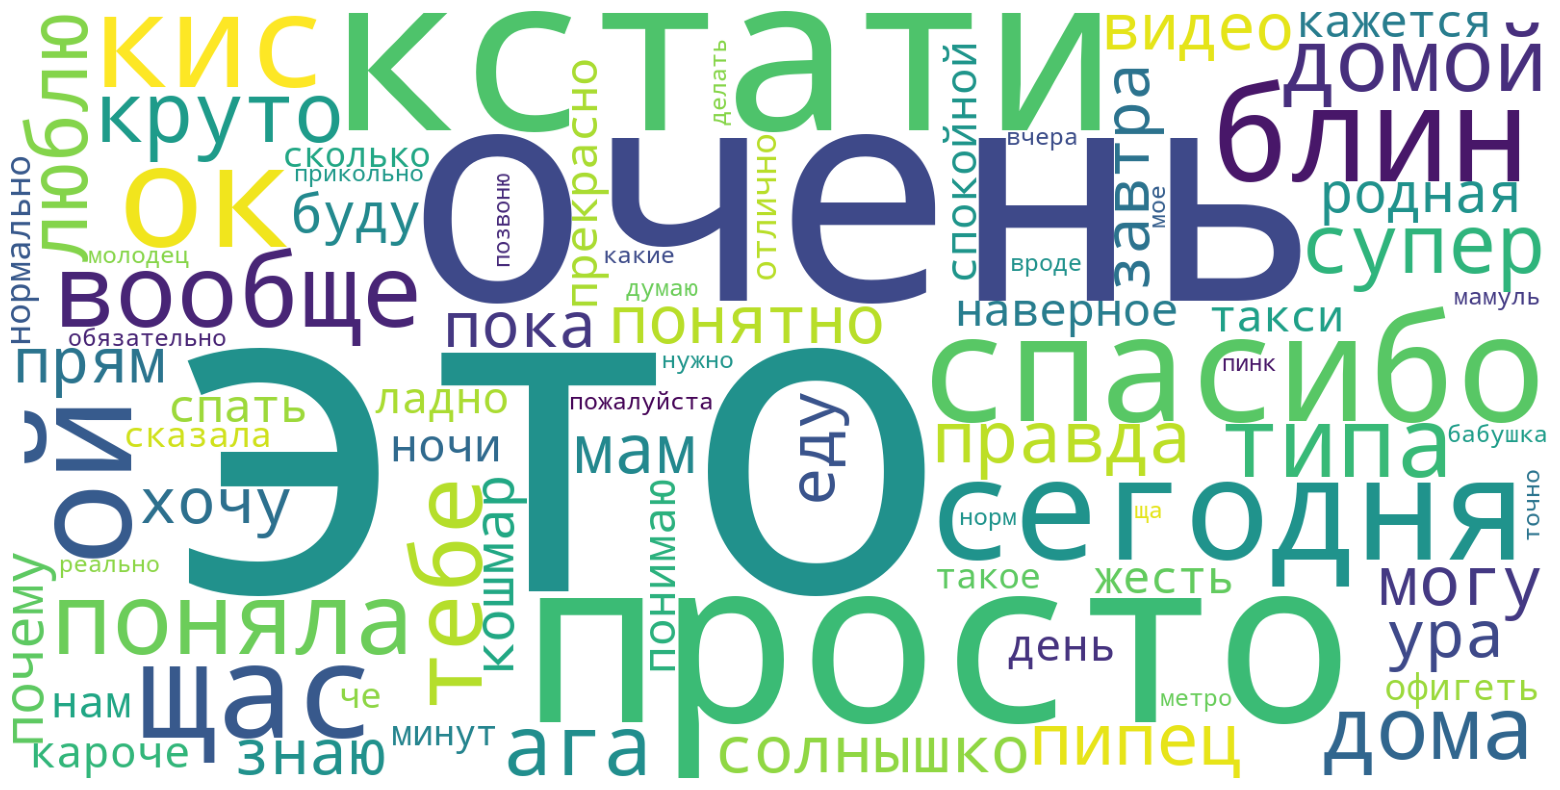

In [9]:
def create_cloud_graph(corpus):
    wordcloud = WordCloud(
        width=1600, height=800, max_words=80, background_color='white', colormap='viridis', collocations=False
    ).generate(' '.join(corpus))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

create_cloud_graph(clear_data)